<a href="https://colab.research.google.com/github/crgraham/Twitter-data-times-series-eval/blob/main/Fitting_probability_distribution_to_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#Dr Calbert Graham
#Phonetics Laboratory, University of Cambridge


# 1. Introduction
In this experiment, as a preliminary step to doing the tweet time series analysis, we will try to find the distribution that best fits the tweet data. The approach here will entail choosing one or multiple models (specific classes of distributions) from which the data might be drawn. We will follow the following iterative approach based on 4 steps to fit the distribution:

1. **Find the distribution from which the data might be drawn**;
2. **Estimate the parameters of that distribution**;
3. **Evaluate the quality of the fit**;
4. **If the fit is not good enough, go back to 1; otherwise stop**

We will rely on two very important tools: the plot of the complementary cumulative distribution function - CCDF - (or tail distribution) on a log-log scale and a qqplot.

The plot of the CCDF on a log-log scale allows us to make a very strong guess at which class of distribution the data belongs to (i.e., exponential, extreme value, or heavy-tailed), by visually “testing" what type of tails are exhibited.

We will use the seaborn library function ecdfplot() to plot the cumulative distribution function (CDF), from which the CCDF is derived as CCDF = 1 - CDF.

In [ ]:
#import packages and dataset

import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
tweet_data = pd.read_csv("http://www.eecs.qmul.ac.uk/~linwang/download/ecs764/tweet-time-series", header=None, sep=" ")
# I sub-select seconds 60000-69,999 for fitting the distribution
tweet_data1 = tweet_data.iloc[60000:70000, 1]
display(tweet_data1)
#column 1: seconds; column 2: number of tweets in that second




Use this code to open (and view data) in **Google colab** from own computer:

from google.colab import files

tweet_data = files.upload()

import io

data = pd.read_csv(io.BytesIO(data['tweet-time-series.txt']))

display(data)

# 2. Model selection

Here we will plot the CCDF of the data to examine the tail and select the most appropriate model. The distribution is a theoretical model of the data.

We will following these steps:
1. find the most appropriate class  
2. create a shortlist of candidate distributions 
3. narrow down the field to a specific distribution

## 2.1. Density plot and CCDF of time series data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'density of tweet ts')

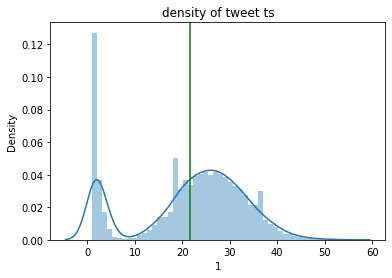

In [2]:

#density plot plotted to get a sense of distribution
sns.distplot(tweet_data1, bins = 50)
median = np.median(tweet_data1)
mean = np.mean(tweet_data1)
plt.axvline(x = mean, color = 'green')
plt.title("density of tweet ts")

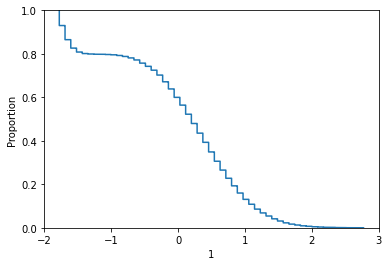

In [3]:
#CCDF of the sub-selected data
# CCDF is the complementary of CDF (i.e. 1-CDF)
def standardize(data):
  z = (data - np.mean(data))/np.std(data)
  return z
data = standardize(tweet_data1)
sns.ecdfplot(data, complementary = True)
##

## 2.2. CCDF plots of reference distributions

Observing the CCDF of the time series data, we can see that the distribution decreases quite quickly and is not heavy-tailed.

To fit the distribution we will next generate CCDFs from random numbers distributed according to three distribution types to compare their tails: Exponential (specifically Normal), Extreme value (specifically Weibull),and Heavy-tailed (specifically Pareto).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<Figure size 432x288 with 0 Axes>

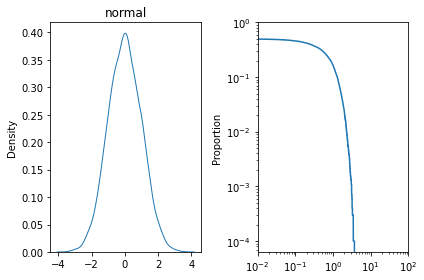

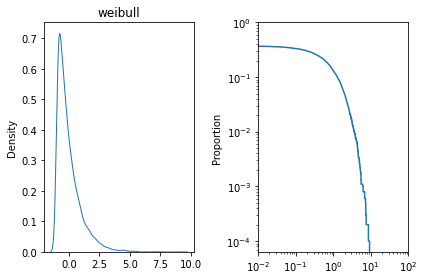

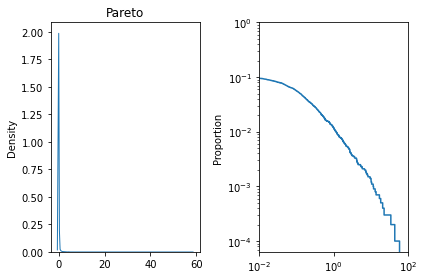

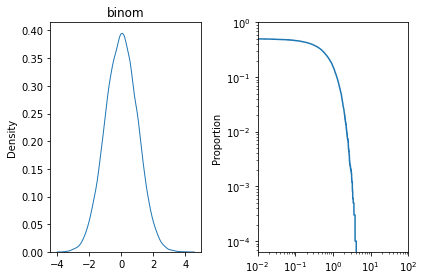

<Figure size 432x288 with 0 Axes>

In [46]:

# log-log CCDF plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def standardize(data):
  z = (data - np.mean(data))/np.std(data)
  return z
# Generate selected three patterns using random data - 10000 data points in each
x1 = np.random.normal(0,1,10000)
x2 = np.random.weibull(1 ,10000)
x3 = np.random.pareto(1 ,10000)
x4 = np.random.normal(0,1, 10000)

#We standardise the variables
x1 = standardize(x1)
x2 = standardize(x2)
x3 = standardize(x3)
x4 = standardize(x4)
x5 = np.concatenate([x1, x4])


# normal - exponential
plt.figure()
plt.subplot(121)
sns.distplot(x1, hist = False, kde=True, norm_hist=True,kde_kws={'linewidth':1})
plt.title('normal')
plt.subplot(122)
sns.ecdfplot(x1, complementary = True)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,100)
plt.tight_layout()
plt.figure()


#weibull - extreme
plt.subplot(121)
sns.distplot(x2, hist = False, kde=True, norm_hist=True,kde_kws={'linewidth':1})
plt.title('weibull')
plt.subplot(122)
sns.ecdfplot(x2, complementary = True)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,100)
plt.tight_layout()
plt.figure()

# pareto - heavy-tailed
plt.subplot(121)
sns.distplot(x3, hist = False, kde=True, norm_hist=True,kde_kws={'linewidth':1})
plt.title('Pareto')
plt.subplot(122)
sns.ecdfplot(x3, complementary = True)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,100)
plt.tight_layout()
plt.figure()



**Question**: What is the most appropriate distribution for the data?

**Answer**: From comparisons of the CCDF plot of the data and the reference plots of the random data samples, it can be observed that the tail of CCDF of the data decreases fast in such a way that it appears to match either an exponential or an extreme value distribution. We can therefore immediately rule out heavy-tailed distribution. 

Between exponential and extreme value it would seem to match exponential better because of the sharp corners, although it is quite difficult to tell them apart purely on the basis of visual inspection. 


# 3. Model Likelihood estimation

Based on the visual inspection in the previous section, I estimated that the model distribution is either extreme or exponential, but we could not determine precisely which candidate was the best fit based on visual inspection alone.
This leaves us with various options - exponential distrubution: Normal, Exponential and extreme distributions: Gamma, and Lognorm. Therefore, we now need to estimate the parameters of the candidate distributions, i.e., step 2 of the methodology set out in the Introduction.

**The basics of MLE**:
<ul>
<li>Known: a set of data variables, probability distribution model</li>
<li>Unknown: model parameters</li>
<li>Assumption: all the data variables are independent and identically distributed(iid)</li>
</ul>

**MLE methods**:

There are various methods available to do MLE, but here I use a statistical method: hyptothesis testing to test the goodness of fit/quality of the data fitting. Specifically, I will implement the Kolmogorov-Smirnov (KS) test here. (A Chi Square test would be more useful for categorical data - e.g. a Poission distribution.)

**KS test:**
<ul>
<li>KS test computes the empirical distribution function from the data and then compares it with the theoretical distribution function for the specified distribution.</li>
<li>Empirical Distribution Function (add formula here) gives an approximation of the theoretical Cumulative Density Function (CDF).</li>
<li>Essentially, this divides the whole observation space into many discrete areas. For each area, it computes the normal sample that has a value smaller than the boundary of the area. It is therefore a very good approximation of the cumulative distribution function.</li>
</ul>

**Basic steps:**
<ol>
<li>We use the largest vertical distance between the two graphs as the test statistic - the smaller the distance the better the fit.</li>

<li>We can then calculate the p-value</li>

<li>If the distance is too large for a given significance level, the null hypothsis is rejected - the larger the distance the smaller the p-value</li>

<li>Make a decision: Rejecting null hypothesis means the two datasets have different distributions.</li>







In [ ]:
#import packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.stats as st

#a function to standardise the data
def standardize(observation):
  z = (observation-np.mean(observation))/np.std(observation)
  return z

def get_quantiles(data):
    quantiles = []
    for q in np.arange(0, 1.001, 0.001):
        quantiles.append(np.quantile(data, q))
    return quantiles  

#Function to plot the distribution of the data with the reference distribution
def pyqqplot(data1, data2):
    plt.figure()
    data1 = standardize(data1)
    data2 = standardize(data2)
    q1 = np.array(get_quantiles(data1))
    q2 = np.array(get_quantiles(data2))
    plt.scatter(q1, q2 )

    minim = min(data1.min(), data2.min())
    maxim = max(data1.max(), data2.max())
    plt.plot([minim, maxim], [minim, maxim], 'r-')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

#tweet data
x = data

# We use Scipy to create a dist_name_list so that all selected distrbutions are presented together
dist_name_list = ['norm', 'expon', 'gamma','lognorm']
for dist_name in dist_name_list:
  dist = getattr(scipy.stats, dist_name)
  param = dist.fit(x) #get parameters of the distribution; x is the data
  print(param)
  x_sort = np.sort(x)
  pdf_fitted = dist.pdf(x_sort, *param)
  plt.figure()
  plt.hist(x, density=True, bins=20)
  plt.plot(x_sort,pdf_fitted)
  mystr = '%s, loc= %0.2f, scale=%0.2f' % (dist_name, param[-2], param[-1])
  plt.title(mystr)
  y = dist.rvs(*param, size=10000)
  pyqqplot(x,y)

  # aa is the distance variable and test statitic p-value
  aa, p = scipy.stats.kstest(x,dist_name, args=param)
  print('p =', p, '\n')
  print('distance =', aa, '\n')



Note: we implemented the Kolmogorov-Smirnov (KS) test here to compare the distribution by quantifying the distance between two samples: the reference distribution (norm, exponential, gamma, lognorm) and the empirical distribution function of the twitter data)

##4. Results##

*Question*: Which distrubution fits the data best?

*Answer*: Based on the qq plots and the KS test, it would appear that actually none of the distributions we experimented with fits the data.

*Discussion*:
Given that the data is likely to be distributed according to a distribution of a specific class, we will need to reflect on what we might have done differently to improve the fit to the data. This takes us back to Step 1 of the introduction. Options that we can change include:

(1) selecting a different distribution (e.g. a _bimodal_ one, such as a _mixture_ of normal distributions) 

(2) selecting a different subset of data is another viable way to improve the fit.

As the KS test is based on maximum distance of the whole CDF function, outliers would affect its accuracy. However, manual parameter tuning can be highly problematic, so alternative tests like the Shapiro Wilks that can automatically test whether the data is normally distributed without having to manually specify the parameters
